# Individual Project

# Project Goal
* Predict the Mean Temperature for the day listed
* Use Regression models to make predictions

# Imports

In [1]:
import pandas as pd
import env
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import os
import wrangle as w
import explore as e
import model as m

from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Aquire
* Data aquired from Summmary_of_Weather.csv
* It contains 119040 rows and 31 features before cleaning
* Each row represents the reading from a single station on a single day
* Each column represents a feature that was measured

# Prepare
###### Prepare Actions:
* Removed columns that did not contain useful information
* Renamed columns to provide readability
* Checked for null in the data
* Checked that colmn data types were appropriate
* Removed white space from values in object columns
* Encoded categorical variables
* Split data into train, validate, and test
* Outliers were not removed

# Data Dictionary
| Feature | Definition |
|:--------|:-----------|
|STA| Weather Station|
|Date| The Date|
|Precip| Precipitation in mm|
|MaxTemp| Maximum temperature in degrees Celsius|
|MinTemp| Minimum temperature in degrees Celsius
|MeanTemp| Mean temperature in degrees Celsius
|Snowfall| Snowfall and ice pellets in mm|
|YR| Year of observation|
|MO| Month of observation|
|DA| Day of observation|

In [2]:
# aquire the Summary of Weather and looking over it
df = pd.read_csv('Summary_of_Weather.csv')
df.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# preparing the data
df = w.prepare_data(df)

In [4]:
# split data into train, validate and test dataframes
train, validate, test = w.train_validate_test_split(df)

# A brief look at the data

In [5]:
train.head()

,STA,Date,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,YR,MO,DA
78607,32907,1944-4-30,34.036,26.111111,20.555556,23.333333,0.0,44,4,30
70920,32701,1943-5-19,0.000,42.222222,22.222222,32.222222,0.0,43,5,19
57978,22508,1940-4-11,0.000,25.000000,16.666667,21.111111,0.0,40,4,11
49993,20501,1942-9-30,0.000,28.888889,23.333333,26.111111,0.0,42,9,30
103229,50801,1942-12-2,0.000,22.777778,19.444444,21.111111,0.0,42,12,2


# A summary of the data

In [6]:
train.describe()

,STA,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,YR,MO,DA
count,82510.000000,82510.000000,82510.000000,82510.000000,82510.000000,82510.000000,82510.000000,82510.000000,82510.000000
mean,29792.896097,3.201807,27.255067,17.963742,22.605085,0.247628,43.802048,6.734299,15.822761
std,21017.351753,10.791867,8.435709,8.130199,8.043705,2.655005,1.136961,3.423846,8.803483
min,10001.000000,0.000000,-32.222222,-37.777778,-34.444444,0.000000,40.000000,1.000000,1.000000
25%,11801.000000,0.000000,25.555556,15.000000,21.111111,0.000000,43.000000,4.000000,8.000000
50%,22508.000000,0.000000,29.444444,21.111111,25.555556,0.000000,44.000000,7.000000,16.000000
75%,33501.000000,0.762000,31.666667,23.333333,27.222222,0.000000,45.000000,10.000000,23.000000
max,82506.000000,307.340000,48.333333,34.444444,40.000000,83.820000,45.000000,12.000000,31.000000


# Explore

## Question 1: What is the distribution of Mean Temperature

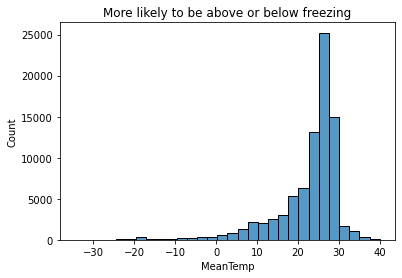

In [7]:
e.freezing_meantemp(train)

###### The range of Mean Temperature is around mid-twenties celsius

## Question 2: Can you predict Mean Temperature with Day?

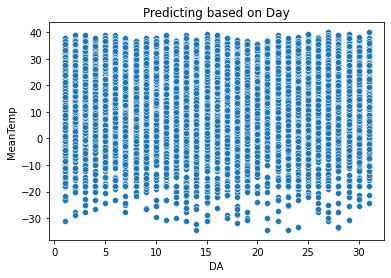

In [8]:
e.day_meantemp(train)

###### There is no correlation between Day and Mean Temperature

## Question 3: Can you predict Mean Temperature with Month

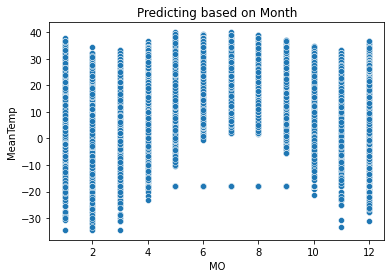

In [9]:
e.month_meantemp(train)

###### There appears to be a correlation between Month and Mean Temperature

##### I will now use a chi-square test to investigate whether 'Month' and 'Mean Temperature' are related
    * I will use a confidence interval of 95%
    * The resulting alpha is .05

#### H_0: 'Month' and 'Mean Temperature' are independent of one another
#### Ha: 'Month' and 'Mean Temperature' are related

In [10]:
e.get_month(train)

chi^2 = 12413.1899
p     = 0.0000


##### The p-value is greater than the alpha. Therefore, we have evidence to support that 'Month' and 'Mean Temperature' are related

## Question 4: Can you predict Mean Temperature with Year?

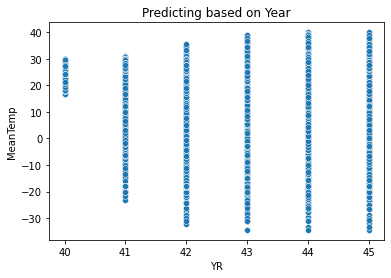

In [11]:
e.year_meantemp(train)

###### There appears to be a correlation between Year and Mean Temperature

##### I will now use a chi-square test to investigate whether 'Year' and 'Mean Temperature' are related
    * I will use a confidence interval of 95%
    * The resulting alpha is .05

#### H_0: 'Year' and 'Mean Temperature' are independent of one another
#### Ha: 'Year' and 'Mean Temperature' are related

In [12]:
e.get_year(train)

chi^2 = 4967.7551
p     = 0.0000


##### The p-value is greater than the alpha. Therefore, we have evidence to support that 'Year' and 'Mean Temperature' are related

## Question 5: Can you predict Mean Temperature based on Precipitation?

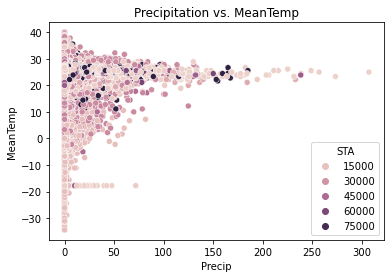

In [13]:
e.precipitation_meantemp(train)

###### There appears to be a correlation between Precipitation and Mean Temperature

##### I will now use a chi-square test to investigate whether 'Precipitation' and 'Mean Temperature' are related
    * I will use a confidence interval of 95%
    * The resulting alpha is .05

#### H_0: 'Precipitation' and 'Mean Temperature' are independent of one another
#### Ha: 'Precipitation' and 'Mean Temperature' are related

In [14]:
e.get_precipitation(train)

chi^2 = 23408.5631
p     = 1.0000


##### The p-value is lesser than the alpha. Therefore, we do not have evidence to support that 'Precipitation' and 'Mean Temperature' are related

## Question 6: Can you predict Mean Temperature based on Snowfall?

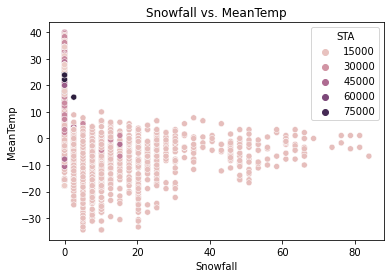

In [15]:
e.snowfall_meantemp(train)

###### There appears to be a correlation between Snowfall and Mean Temperature

##### I will now use a chi-square test to investigate whether 'Snowfall' and 'Mean Temperature' are related
    * I will use a confidence interval of 95%
    * The resulting alpha is .05

#### H_0: 'Snowfall' and 'Mean Temperature' are independent of one another
#### Ha: 'Snowfall' and 'Mean Temperature' are related

In [16]:
e.get_snowfall(train)

chi^2 = 117585.1336
p     = 0.0000


###### The p-value is greater than the alpha. Therefore, we have evidence to support that 'Snowfall' and 'Mean Temperature' are related

# Exploration Summary
* The distribution of Mean Temperature is mostly clustered around the mid-twenties celsius
* You cannot predict Mean Temperature with Day
* You can predict Mean Temperature with Month
* You can predict Mean Temperature with Year
* You cannot predict Mean Temperature with Precipitation
* You can predict Mean Temperature with Snowfall

## Features I am moving to modeling with
* Month (There is eveidence Mean Temperature can be predicted with the feature)
* Year (There is eveidence Mean Temperature can be predicted with the feature)
* Snowfall (There is eveidence Mean Temperature can be predicted with the feature)

## Features I am  not moving to modeling with
* All other featers I am not moving forward with

# Modeling
* I will use accuracy prediction as evaluation metric
* I will be evaluating models developed using four different model types and various hyperparameter configurations
* Models will be evaluated on train and validate data
* The model that performs the best will then be evaluated on test data
* The baseline for modeling will be the mean of the TempMean data

In [17]:
#prep data for modeling
train_X, validate_X, test_X, train_y, validate_y, test_y = m.model_prep(train, validate, test)

In [18]:
#get the overall mean of temperature
m.get_mean(train_y, validate_y)

RMSE using Mean
Train/In-Sample:  8.04 
Validate/Out-of-Sample:  8.11


## Linear Regression

In [19]:
rmse_train, rmse_validate = m.linear_regression(train_X, train_y, validate_X, validate_y)

RMSE for OLS using LinearRegression
Training/In-Sample:  7.5621997520787545 
Validation/Out-of-Sample:  7.662279293121614


## LassoLars

In [20]:
rmse_train, rmse_validate = m.lassolars(train_X, train_y, validate_X, validate_y)

RMSE for Lasso + Lars
Training/In-Sample:  8.043655927130242 
Validation/Out-of-Sample:  8.113052354057269


## Polynomial

In [21]:
rmse_train, rmse_validate = m.polynomial(train_X, train_y, validate_X, validate_y, test_X)

RMSE for Polynomial Model, degrees=2
Training/In-Sample:  7.046650777844723 
Validation/Out-of-Sample:  7.171467494371597


## Comparing Models
###### Polynomial performs the worst out of all the models and LassLars performs the best
###### Summary
* Polynomial performed the worst out of all the models so it will be dismissed
* Linear Regression performed well but not close enough
* LassoLars performed nearly perfectly on both train and validate and will be used for the test data

## LassoLars on Test

In [22]:
rmse_test = m.lassolars_test(test_X, test_y)

RMSE for Lasso + Lars
Test/In-Sample:  8.049964984262017


## Modeling Summary
* Polynomial and Linear Regression models underperforemed and were not suitable for the testing
* The LassoLars model performed very well
* The LassoLars on the test data was 99% accurate.

# Conclusions
* The average temperature throughout the war was 8 degrees celsius
* You can predict the temperature with snowfall, the month, and the year

# Recommendations
* Feature gathering of temperature comparing where it is taken

# Next Steps
* Comparing weather from then to now would yield siginicant results
* Features that include what type of environmnet the data was taken from such as arid, temperate or artic